In [3]:
import pandas as pd

In [4]:
merged_data = pd.read_csv('merged_data_final.csv')

merged_data.head()

,Variety,Reason,Year,Study,Location,ZS49PlHt,ZS49 (no days),HrvPlHt,GrYld(kg/ha),D1H00051861,...,L7H657085535,L7H657085541,L7H657104991,L7H657131781,L7H657146353,L7H657146356,L7H657147154,L7H657147171,L7H657147173,L7H657156298
0,Commander,AUS-CTL,2014,NtL,STHPER,55.0,92.000000,72.0,NaN,1,...,1,1,1,1,1,1,0,1,1,1
1,Commander,AUS-CTL,2014,18Hrs,STHPER,38.0,63.000000,55.0,NaN,1,...,1,1,1,1,1,1,0,1,1,1
2,Commander,AUS-CTL,2015,TOP1,NaN,NaN,104.272727,NaN,NaN,1,...,1,1,1,1,1,1,0,1,1,1
3,Commander,AUS-CTL,2015,TOP2,NaN,NaN,105.000000,NaN,NaN,1,...,1,1,1,1,1,1,0,1,1,1
4,Commander,AUS-CTL,2015,TOP3,NaN,NaN,96.333333,NaN,NaN,1,...,1,1,1,1,1,1,0,1,1,1


In [5]:
merged_data.shape

(6675, 30552)

In [6]:
missing_values_count = merged_data.iloc[:, 0:10].isna().sum()
print(missing_values_count)

Variety              0
Reason               0
Year                 0
Study             2670
Location          1335
ZS49PlHt          2448
ZS49 (no days)    1458
HrvPlHt           5872
GrYld(kg/ha)      4058
D1H00051861          0
dtype: int64


In [7]:
dataset = merged_data.copy()
dataset.shape

(6675, 30552)

In [8]:
dataset.drop(columns=['Reason','Year','Study','Location','ZS49PlHt','HrvPlHt','ZS49 (no days)'], inplace=True)
dataset.head()

,Variety,GrYld(kg/ha),D1H00051861,D1H000263584,D1H000275564,D1H000277624,D1H000277628,D1H000277656,D1H000277673,D1H000278185,...,L7H657085535,L7H657085541,L7H657104991,L7H657131781,L7H657146353,L7H657146356,L7H657147154,L7H657147171,L7H657147173,L7H657156298
0,Commander,NaN,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
1,Commander,NaN,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,Commander,NaN,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3,Commander,NaN,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,Commander,NaN,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [9]:
missing_values_count = dataset.iloc[:, 0:10].isna().sum()
print(missing_values_count)

Variety            0
GrYld(kg/ha)    4058
D1H00051861        0
D1H000263584       0
D1H000275564       0
D1H000277624       0
D1H000277628       0
D1H000277656       0
D1H000277673       0
D1H000278185       0
dtype: int64


In [10]:
dataset.shape

(6675, 30545)

In [11]:
dataset.dropna(subset=['GrYld(kg/ha)'], inplace=True)
dataset.shape

(2617, 30545)

In [12]:
dataset.drop(columns=['Variety'], axis=1, inplace=True)
dataset.head()

,GrYld(kg/ha),D1H00051861,D1H000263584,D1H000275564,D1H000277624,D1H000277628,D1H000277656,D1H000277673,D1H000278185,D1H000278243,...,L7H657085535,L7H657085541,L7H657104991,L7H657131781,L7H657146353,L7H657146356,L7H657147154,L7H657147171,L7H657147173,L7H657156298
7,2410.546686,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
8,4024.875000,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
9,2360.503472,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
10,3683.541667,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
11,4060.034722,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1


In [13]:
X = dataset.drop(columns=['GrYld(kg/ha)'], axis=1)
y = dataset['GrYld(kg/ha)']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test) 


(2617, 2093, 524)

In [15]:
# Fit the scaler on training data and transform both training and validation data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Optuna

In [16]:
import optuna
import tensorflow as tf
from packaging import version

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input 
from tensorflow.keras.optimizers import Adam


## CNN 

Value (Trial): 7
Value (MSE): 972386.4044
Value (RMSE): 986.0965
Params:
n_filters: 61
kernel_size: 2
activation: relu
dense_units: 47
dropout_rate: 0.4080875117110648

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.regularizers import l2

best_model = Sequential()

best_model.add(Conv1D(filters = 61, 
                      kernel_size = 2, 
                      activation='relu',
                      kernel_regularizer= l2(0.01), 
                      bias_regularizer= l2(0.01),
                      input_shape=(X_train_scaled.shape[1],1)))

best_model.add(MaxPooling1D(pool_size=2))
best_model.add(Dropout(0.4080875117110648))

best_model.add(Conv1D(filters = 61, 
                      kernel_size = 2, 
                      activation='relu',
                      kernel_regularizer= l2(0.01), 
                      bias_regularizer= l2(0.01),
                      input_shape=(X_train_scaled.shape[1],1)))
best_model.add(MaxPooling1D(pool_size=2))
best_model.add(Dropout(0.4080875117110648))

best_model.add(Flatten())

best_model.add(Dense(47, activation='relu', kernel_regularizer= l2(0.01), bias_regularizer= l2(0.01)))
best_model.add(Dropout(0.4080875117110648))

best_model.add(Dense(1))

best_model.compile(optimizer='adam', loss='mse',metrics=[RootMeanSquaredError()])

best_model.summary()

c:\Users\34647859\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30542, 61)      │           183 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15271, 61)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15271, 61)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15270, 61)      │         7,503 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7635, 61)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7635, 61)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 465735)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 47)             │    21,889,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 47)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,897,326 (83.53 MB)

 Trainable params: 21,897,326 (83.53 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = best_model.fit(
    X_train_scaled, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2,
    verbose=1, 
    callbacks=[early_stopping])

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - loss: 3333211.7500 - root_mean_squared_error: 1798.1759 - val_loss: 1291581.8750 - val_root_mean_squared_error: 1136.4695
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - loss: 1535386.7500 - root_mean_squared_error: 1238.4502 - val_loss: 1199221.5000 - val_root_mean_squared_error: 1095.0768
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 506ms/step - loss: 1292881.6250 - root_mean_squared_error: 1136.9064 - val_loss: 1274085.7500 - val_root_mean_squared_error: 1128.7382
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 505ms/step - loss: 1187637.1250 - root_mean_squared_error: 1089.5366 - val_loss: 1189355.6250 - val_root_mean_squared_error: 1090.5557
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - loss: 1133518.8750 - root_mean_squared_error: 1064.5223 - val_loss: 1145734.1250 - val_root_mean_squared_error: 1070.3651
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 504ms/step - loss: 1121268.2500 - root_mean_squared_error: 1057.853

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print(f"MSE (Train): {mse:.4f}")
print(f"MAE (Test): {mae:4f}")
print(f"RMSE (Train): {rmse:.4f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step
MSE (Train): 790487.3891
MAE (Test): 710.955635
RMSE (Train): 889.0936


In [18]:
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE (Test): {mse:.4f}")
print(f"MAE (Test): {mae:4f}")
print(f"RMSE (Test): {rmse:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
MSE (Test): 1110610.7214
MAE (Test): 870.509394
RMSE (Test): 1053.8552


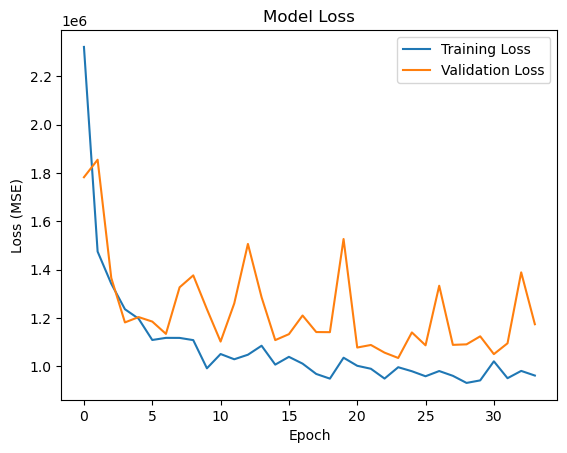

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [ ]:
# best_model.save('latest_model_shap.h5')
# best_model.save_weights('latest.weights.h5')

In [74]:
best_model.save('latest_model_shap.keras')

In [ ]:
# # You need to define the model architecture first
# model = create_model()  # Your function to create the model
# model.load_weights('cnn.weights.h5')

In [19]:
# from tensorflow.keras.models import load_model

# loaded_model = load_model('latest_model.keras')

c:\Users\34647859\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [20]:
import shap
import numpy as np
import matplotlib.pyplot as plt

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/neural_networks/Census%20income%20classification%20with%20Keras.html#Explain-predictions

https://www.kirenz.com/blog/posts/2022-06-17-explainable-ai-with-tensorflow-keras-and-shap/

In [ ]:
background_size = min(int(X_train_scaled.shape[0] * 0.1), 100)  

background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], background_size, replace=False)]
background = background.reshape(background.shape[0], background.shape[1],1)

explainer = shap.DeepExplainer(best_model, background)

samples_to_explain = X_test_scaled[:int(X_test_scaled.shape[0]*1)]  
samples_to_explain = samples_to_explain.reshape(samples_to_explain.shape[0], samples_to_explain.shape[1],1)

c:\Users\34647859\AppData\Local\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [1]:
# Compute SHAP values
shap_values = explainer.shap_values(samples_to_explain)

print("Shape of shap_values:", np.array(shap_values).shape)
print("Shape of samples_to_explain:", samples_to_explain.shape)

NameError: name 'explainer' is not defined

In [23]:
shap_values = np.squeeze(shap_values) 
samples_to_explain = np.squeeze(samples_to_explain) 

print("New shape of shap_values:", shap_values.shape)
print("New shape of samples_to_explain:", samples_to_explain.shape)

New shape of shap_values: (52, 30543)
New shape of samples_to_explain: (52, 30543)


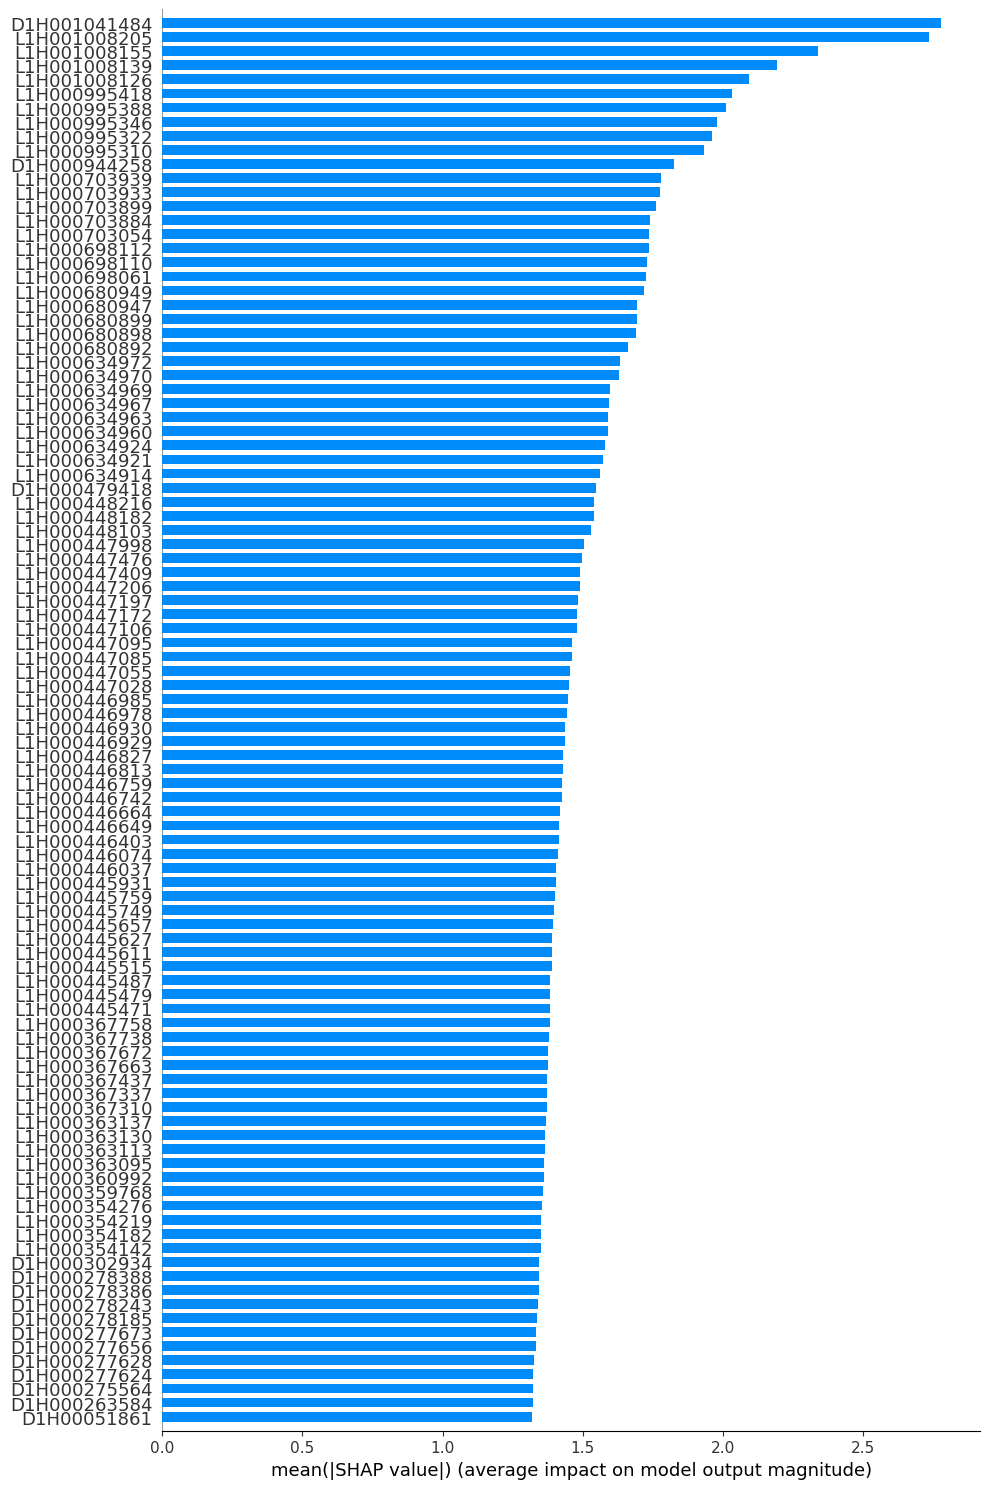

In [31]:
mean_shap_values = np.mean(np.abs(shap_values), axis=0)

feature_names = X.columns.tolist()

# indices of the top 100 features by mean absolute SHAP value
top_indices = np.argsort(mean_shap_values)[-100:]

shap.summary_plot(shap_values[ : , top_indices],
                  samples_to_explain[:,top_indices],
                  feature_names,
                  plot_type = 'bar',
                  max_display=100,
                  plot_size = (10,15)) 

# plt.savefig('Shap_Bar_Plot.png')